<left>
    <h4>RANDOM FOREST HYPERTUNING BY RANDOMSEARCH </h4>
</left>

---

In [9]:
# =============================================
# 🧠 CNN + LSTM Feature Extractor + SVM Classifier (FIXED)
# =============================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# --- 1. Load data ---
df = pd.read_csv("../Dataset/data_scaled_clean.csv", delimiter=";")

# --- 2. Cleaning ---
df = df.replace(',', '.', regex=True)
df.columns = df.columns.str.strip().str.lower()

# --- 3. Fitur dan Label ---
X = df.drop(columns=['status', 'hba1c', 'berat', 'tinggi'])
y = df['status']

# --- 4. Encode label ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 5. SMOTE Oversampling ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("\n=== Distribusi Kelas Setelah SMOTE ===")
unique, counts = np.unique(y_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.inverse_transform([u])[0]}): {c}")
print(f"Total data setelah SMOTE: {len(y_resampled)} sampel")

# --- 6. Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# --- 7. Normalisasi ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 8. Reshape ke (samples, timesteps, features=1) ---
X_train_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled = np.expand_dims(X_test_scaled, axis=2)

# --- 9. CNN + LSTM Model (explicit Input layer) ---
inputs = Input(shape=(X_train_scaled.shape[1], 1))
x = Conv1D(64, 2, activation='relu')(inputs)
x = MaxPooling1D(pool_size=2)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

feature_model = Model(inputs=inputs, outputs=x)

# --- 10. Ekstrak fitur ---
features_train = feature_model.predict(X_train_scaled)
features_test = feature_model.predict(X_test_scaled)

print("\nShape fitur latih:", features_train.shape)

# --- 11. Klasifikasi pakai SVM ---
svm_clf = SVC(kernel='rbf', C=1, gamma='scale')
svm_clf.fit(features_train, y_train)
y_pred = svm_clf.predict(features_test)

# --- 12. Evaluasi ---
print("\n=== Evaluasi Model CNN+LSTM + SVM ===")
print(classification_report(y_test, y_pred))
print(f"🎯 Akurasi: {accuracy_score(y_test, y_pred):.4f}")



=== Distribusi Kelas Setelah SMOTE ===
Class 0 (Diabetes): 2921
Class 1 (Non-diabetes): 2921
Class 2 (Prediabetes): 2921
Total data setelah SMOTE: 8763 sampel
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Shape fitur latih: (7010, 64)

=== Evaluasi Model CNN+LSTM + SVM ===
              precision    recall  f1-score   support

           0       0.60      0.72      0.66       584
           1       0.52      0.43      0.47       584
           2       0.60      0.58      0.59       585

    accuracy                           0.58      1753
   macro avg       0.57      0.58      0.57      1753
weighted avg       0.57      0.58      0.57      1753

🎯 Akurasi: 0.5790


✅ Semua fitur numerik dan siap untuk SMOTE.

Setelah SMOTE:
Class 0 (Diabetes): 2921
Class 1 (Non-diabetes): 2921
Class 2 (Prediabetes): 2921
Input shape CNN: (7010, 8, 1)

🚀 Training Model 1 (Simple)...
Epoch 1/30


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5177 - loss: 0.9917 - val_accuracy: 0.6794 - val_loss: 0.7244
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7151 - loss: 0.6634 - val_accuracy: 0.7074 - val_loss: 0.6621
Epoch 3/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7328 - loss: 0.6328 - val_accuracy: 0.7056 - val_loss: 0.6481
Epoch 4/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7478 - loss: 0.6008 - val_accuracy: 0.7262 - val_loss: 0.6238
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7443 - loss: 0.6104 - val_accuracy: 0.7256 - val_loss: 0.6233
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7488 - loss: 0.5779 - val_accuracy: 0.7182 - val_loss: 0.6140
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 0.5591 - val_accuracy: 0.7279 - val_loss: 0.6092
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7576 - loss: 0.5532 - val_accuracy: 0.7410 - val_

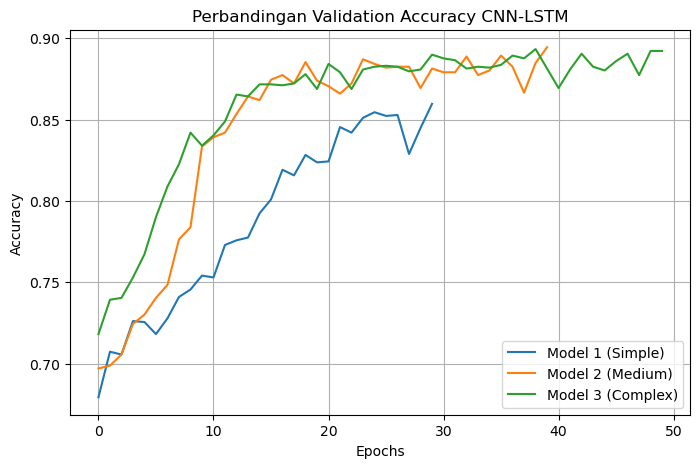

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ LOAD DATA
# ---------------------------
df = pd.read_csv("../Dataset/data_scaled_clean.csv", sep=';')
df.columns = df.columns.str.strip().str.lower()

# ---------------------------
# 2️⃣ PISAHKAN FITUR DAN LABEL
# ---------------------------
X = df.drop(columns=['status', 'hba1c', 'berat', 'tinggi', 'hdl'])
y = df['status']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------------------
# 🧹 CLEANING (fix koma & string)
# ---------------------------
X = X.replace(',', '.', regex=True)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

if X.isnull().sum().sum() > 0:
    print("\n⚠️ Ada nilai NaN, menghapus baris invalid...")
    valid_index = X.dropna().index
    X = X.loc[valid_index]
    y_encoded = y_encoded[valid_index]

print("✅ Semua fitur numerik dan siap untuk SMOTE.")

# ---------------------------
# 3️⃣ OVERSAMPLING (SMOTE)
# ---------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("\nSetelah SMOTE:")
unique, counts = np.unique(y_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.inverse_transform([u])[0]}): {c}")

# ---------------------------
# 4️⃣ SPLIT DATA TRAIN/TEST
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ---------------------------
# 5️⃣ NORMALISASI
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6️⃣ RESHAPE UNTUK CNN-LSTM
# ---------------------------
X_train_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled = np.expand_dims(X_test_scaled, axis=2)
print("Input shape CNN:", X_train_scaled.shape)

# ---------------------------
# 7️⃣ MODEL 1: Simple CNN-LSTM
# ---------------------------
model1 = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    LSTM(32, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model1.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# 8️⃣ MODEL 2: Medium CNN-LSTM
# ---------------------------
model2 = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model2.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# 9️⃣ MODEL 3: Complex CNN-LSTM
# ---------------------------
model3 = Sequential([
    Conv1D(128, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model3.compile(optimizer=Adam(0.0008), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# 🔟 TRAINING
# ---------------------------
print("\n🚀 Training Model 1 (Simple)...")
history1 = model1.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=30, batch_size=32, verbose=1)

print("\n🚀 Training Model 2 (Medium)...")
history2 = model2.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=40, batch_size=32, verbose=1)

print("\n🚀 Training Model 3 (Complex)...")
history3 = model3.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# ---------------------------
# 🔍 Evaluasi
# ---------------------------
models = [model1, model2, model3]
names = ["Simple", "Medium", "Complex"]

for i, m in enumerate(models):
    loss, acc = m.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\n📊 Model {names[i]} - Akurasi: {acc:.4f}, Loss: {loss:.4f}")

# ---------------------------
# 📈 Plot Akurasi per Model
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(history1.history['val_accuracy'], label='Model 1 (Simple)')
plt.plot(history2.history['val_accuracy'], label='Model 2 (Medium)')
plt.plot(history3.history['val_accuracy'], label='Model 3 (Complex)')
plt.title("Perbandingan Validation Accuracy CNN-LSTM")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


✅ Semua fitur numerik dan siap untuk SMOTE.

Setelah SMOTE:
Class 0 (Diabetes): 2921
Class 1 (Non-diabetes): 2921
Class 2 (Prediabetes): 2921
Input shape CNN: (7010, 8, 1)

🚀 Training Model CNN-LSTM (Medium)...
Epoch 1/40


c:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5252 - loss: 0.9674 - val_accuracy: 0.6959 - val_loss: 0.6912
Epoch 2/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7106 - loss: 0.6585 - val_accuracy: 0.7051 - val_loss: 0.6505
Epoch 3/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7321 - loss: 0.6179 - val_accuracy: 0.7216 - val_loss: 0.6239
Epoch 4/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7338 - loss: 0.5963 - val_accuracy: 0.7262 - val_loss: 0.6087
Epoch 5/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7442 - loss: 0.5906 - val_accuracy: 0.7427 - val_loss: 0.5874
Epoch 6/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7668 - loss: 0.5466 - val_accuracy: 0.7650 - val_loss: 0.5481
Epoch 7/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7950 - loss: 0.5024 - val_accuracy: 0.7958 - val_loss: 0.5000
Epoch 8/40
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8046 - loss: 0.4828 - val_accuracy: 0.8066 - val_

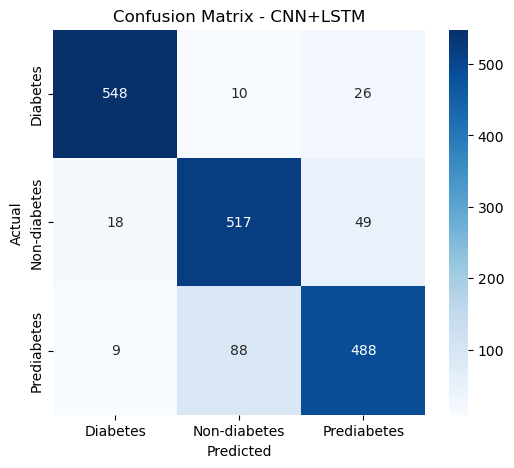

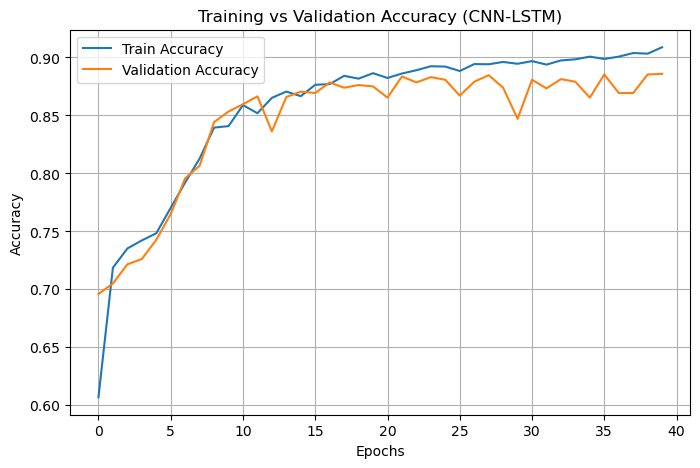

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1️⃣ LOAD DATA
# ---------------------------
df = pd.read_csv("../Dataset/data_scaled_clean.csv", sep=';')
df.columns = df.columns.str.strip().str.lower()

# ---------------------------
# 2️⃣ PISAHKAN FITUR DAN LABEL
# ---------------------------
X = df.drop(columns=['status', 'hba1c', 'berat', 'tinggi', 'hdl'])
y = df['status']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ---------------------------
# 🧹 CLEANING (fix koma & string)
# ---------------------------
X = X.replace(',', '.', regex=True)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

if X.isnull().sum().sum() > 0:
    print("\n⚠️ Ada nilai NaN, menghapus baris invalid...")
    valid_index = X.dropna().index
    X = X.loc[valid_index]
    y_encoded = y_encoded[valid_index]

print("✅ Semua fitur numerik dan siap untuk SMOTE.")

# ---------------------------
# 3️⃣ OVERSAMPLING (SMOTE)
# ---------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

print("\nSetelah SMOTE:")
unique, counts = np.unique(y_resampled, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.inverse_transform([u])[0]}): {c}")

# ---------------------------
# 4️⃣ SPLIT DATA TRAIN/TEST
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ---------------------------
# 5️⃣ NORMALISASI
# ---------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------------------
# 6️⃣ RESHAPE UNTUK CNN-LSTM
# ---------------------------
X_train_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_scaled = np.expand_dims(X_test_scaled, axis=2)
print("Input shape CNN:", X_train_scaled.shape)

# ---------------------------
# 7️⃣ MODEL: CNN-LSTM (Medium)
# ---------------------------
model = Sequential([
    Conv1D(64, 2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=1),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ---------------------------
# 8️⃣ TRAINING
# ---------------------------
print("\n🚀 Training Model CNN-LSTM (Medium)...")
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=40, batch_size=32, verbose=1)

# ---------------------------
# 9️⃣ EVALUASI MODEL
# ---------------------------
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n📊 Akurasi Model CNN-LSTM: {acc:.4f}, Loss: {loss:.4f}")

# ---------------------------
# 🔟 CONFUSION MATRIX & CLASSIFICATION REPORT
# ---------------------------
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)

print("\n=== 📊 Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.inverse_transform([0,1,2])))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.inverse_transform([0,1,2]),
            yticklabels=le.inverse_transform([0,1,2]))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CNN+LSTM')
plt.show()

# ---------------------------
# 📈 Plot Akurasi Training vs Validation
# ---------------------------
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy (CNN-LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
